# ***Projet HR Analyse des performances des employés***


# **Problematique du métier**

L’entreprise souhaite :


- comprendre la répartition des performances des employés,

- identifier les écarts significatifs entre collaborateurs,

- détecter les outliers (performances anormalement basses ou élevées),

- afin d’orienter des actions d’amélioration (formation, management, charge de travail).

# **Objectifs analytiques**


1.   Étudier la distribution des scores de performance
2.   Étudier la distribution des heures travaillées / absences

3.   Identifier :
	- les tendances centrales
	- la dispersion
	- les outliers

4.   Tirer des recommandations business actionnables




# **Étape 1 : Préparation et sélection des variables**

# Importation deu dataset
Charger le fichier "HRDataset_v14.csv" dans un DataFrame pandas, puis afficher les premières lignes, les types de données, les nombres de valeurs non nulles et les statistiques descriptives du DataFrame.

## Charger les données

### Subtask:
Charger le fichier HRDataset_v14.csv dans un DataFrame pandas.


**Reasoning**:
First, import the pandas library to enable data manipulation. Then, load the 'HRDataset_v14.csv' file into a DataFrame named `df` using `pd.read_csv()` to accomplish the subtask.



In [ ]:
import pandas as pd
df = pd.read_csv('/content/HRDataset_v14.csv')
print(df.head())

              Employee_Name  EmpID  MarriedID  MaritalStatusID  GenderID  \
0       Adinolfi, Wilson  K  10026          0                0         1   
1  Ait Sidi, Karthikeyan     10084          1                1         1   
2         Akinkuolie, Sarah  10196          1                1         0   
3              Alagbe,Trina  10088          1                1         0   
4          Anderson, Carol   10069          0                2         0   

   EmpStatusID  DeptID  PerfScoreID  FromDiversityJobFairID  Salary  ...  \
0            1       5            4                       0   62506  ...   
1            5       3            3                       0  104437  ...   
2            5       5            3                       0   64955  ...   
3            1       5            3                       0   64991  ...   
4            5       5            3                       0   50825  ...   

      ManagerName  ManagerID RecruitmentSource PerformanceScore  \
0  Michael Albert  

## Inspection initiale des données

### Subtask:
Afficher les premières lignes du DataFrame, vérifier les types de données et les nombres de valeurs non nulles, et obtenir des statistiques descriptives.


In [ ]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

# **ÉTAPE 2 : Choisir les variables utiles**




In [ ]:
print(data.isnull().sum())
print(data.info())

PerformanceScore    0
EngagementSurvey    0
EmpSatisfaction     0
Absences            0
DaysLateLast30      0
Department          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PerformanceScore  311 non-null    object 
 1   EngagementSurvey  311 non-null    float64
 2   EmpSatisfaction   311 non-null    int64  
 3   Absences          311 non-null    int64  
 4   DaysLateLast30    311 non-null    int64  
 5   Department        311 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 14.7+ KB
None


Variables clés du dataset :

- PerformanceScore

- EngagementSurvey

- EmpSatisfaction

- Absences

- DaysLateLast30

- SpecialProjectsCount

- Department (pour analyse par groupe)


In [ ]:
data = df[
    [
        "PerformanceScore",
        "EngagementSurvey",
        "EmpSatisfaction",
        "Absences",
        "DaysLateLast30",
        "Department"
    ]
]

# **ÉTAPE 3 : Statistiques descriptives (fondation)**





### Analyse des stat descriptives`

L'analyse des statistiques descriptives du DataFrame `df` révèle plusieurs points clés :

*   **Complétude des données :** La plupart des colonnes numériques ne présentent pas de valeurs manquantes (311 entrées sur 311), à l'exception de `ManagerID` qui en compte 8.
*   **Salaires :** La moyenne des salaires est d'environ 69 020 $, avec une forte dispersion (écart-type élevé) et une fourchette allant de 45 046 $ à 250 000 $, suggérant la présence de salaires élevés.
*   **Absences :** En moyenne, les employés ont 10.24 jours d'absence par an, avec un maximum de 20 jours.
*   **Retards (DaysLateLast30) :** La ponctualité est généralement bonne, avec une moyenne de seulement 0.41 jour de retard sur les 30 derniers jours, bien que certains employés aient jusqu'à 6 jours de retard.
*   **Satisfaction et Engagement :** Les scores moyens d'engagement (`EngagementSurvey`) et de satisfaction (`EmpSatisfaction`) sont relativement élevés (4.11 et 3.89 respectivement sur 5), mais les valeurs minimales (1.12 et 1) indiquent des cas isolés de faible engagement ou satisfaction.

# **ÉTAPE 4 : Visualisation des distributions**


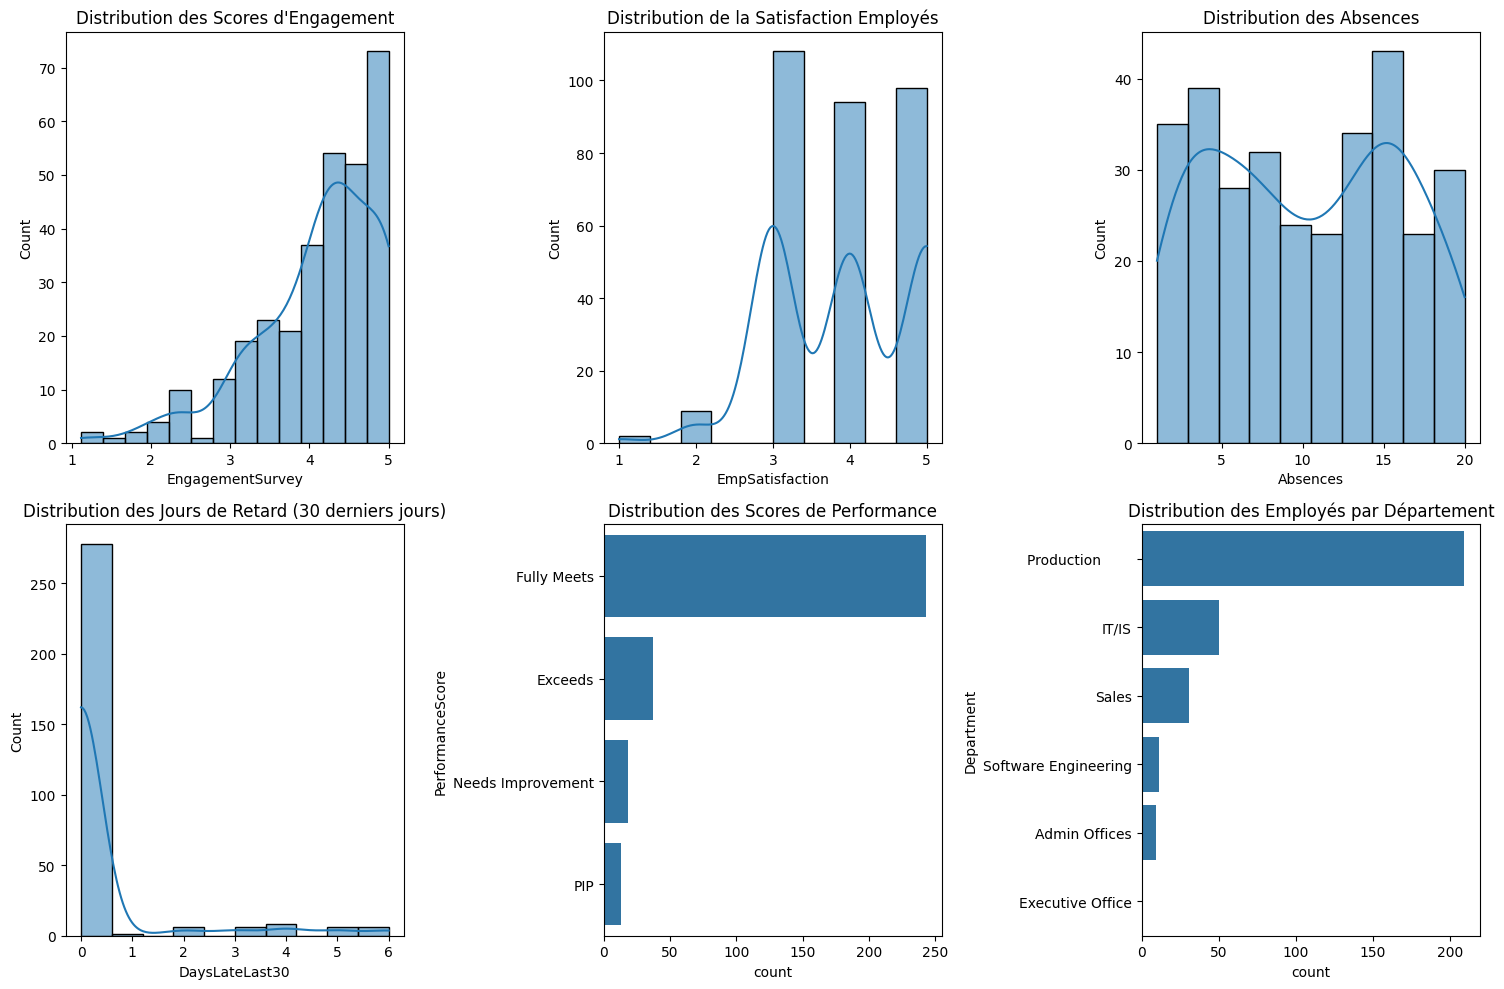

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Histograms for numerical variables
sns.histplot(data['EngagementSurvey'], kde=True, ax=plt.subplot(2, 3, 1))
plt.title('Distribution des Scores d\'Engagement')

sns.histplot(data['EmpSatisfaction'], kde=True, ax=plt.subplot(2, 3, 2))
plt.title('Distribution de la Satisfaction Employés')

sns.histplot(data['Absences'], kde=True, ax=plt.subplot(2, 3, 3))
plt.title('Distribution des Absences')

sns.histplot(data['DaysLateLast30'], kde=True, ax=plt.subplot(2, 3, 4))
plt.title('Distribution des Jours de Retard (30 derniers jours)')

# Count plots for categorical variables
sns.countplot(y=data['PerformanceScore'], ax=plt.subplot(2, 3, 5), order = data['PerformanceScore'].value_counts().index)
plt.title('Distribution des Scores de Performance')

sns.countplot(y=data['Department'], ax=plt.subplot(2, 3, 6), order = data['Department'].value_counts().index)
plt.title('Distribution des Employés par Département')

plt.tight_layout()
plt.show()

# **Interprétation des Visualisations**

Après avoir visualisé les distributions de nos variables clés, voici une interprétation détaillée de chaque graphique :

*   **Distribution des Scores d'Engagement (`EngagementSurvey`)** : La distribution semble légèrement biaisée vers des scores plus élevés, avec une majorité d'employés ayant un engagement entre 3.5 et 5. Il y a une certaine dispersion, mais la plupart des employés se situent dans la partie supérieure de l'échelle.

*   **Distribution de la Satisfaction Employés (`EmpSatisfaction`)** : Cette distribution montre que la majorité des employés sont très satisfaits (scores de 4 et 5), mais il y a aussi une proportion non négligeable d'employés avec des scores plus bas (1, 2, 3), ce qui peut indiquer des problèmes de satisfaction pour certains groupes.

*   **Distribution des Absences (`Absences`)** : La distribution des absences est relativement uniforme, bien qu'il y ait des pics pour certains nombres de jours d'absence (par exemple, autour de 10 et 15 jours). Cela suggère qu'il n'y a pas une seule tendance dominante en matière d'absentéisme, mais plutôt une répartition à travers différentes fréquences.

*   **Distribution des Jours de Retard (30 derniers jours) (`DaysLateLast30`)** : La grande majorité des employés n'ont aucun jour de retard. Les occurrences de retards sont rares et diminuent rapidement à mesure que le nombre de jours de retard augmente, ce qui indique que la ponctualité est globalement bonne, mais avec quelques cas isolés de retards.

*   **Distribution des Scores de Performance (`PerformanceScore`)** : La majorité des employés « Fully Meets » (atteignent pleinement les attentes). Un bon nombre d'employés « Exceeds » (dépassent les attentes), et un petit nombre « Needs Improvement » (nécessitent des améliorations) ou « PIP » (plan d'amélioration de la performance), ce qui est une répartition attendue dans un contexte de gestion de la performance.

*   **Distribution des Employés par Département (`Department`)** : Le département des services de TI (« IT/IS ») est le plus représenté, suivi par les départements de production (qui sont regroupés), et d'autres départements avec moins d'employés. Cela donne un aperçu de la structure organisationnelle de l'entreprise.

Ces visualisations confirment et complètent les informations obtenues par les statistiques descriptives, en offrant une vue graphique des tendances et des répartitions des données.

# **ÉTAPE 5 : Détection FORMELLE des outliers (1.5 × IQR)**


In [ ]:
# Calcul de l'IQR pour la colonne 'Absences'
Q1 = data['Absences'].quantile(0.25)
Q3 = data['Absences'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour la détection des outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers
outliers_absences = data[(data['Absences'] < lower_bound) | (data['Absences'] > upper_bound)]

print(f"Q1 (Absences): {Q1}")
print(f"Q3 (Absences): {Q3}")
print(f"IQR (Absences): {IQR}")
print(f"Borne inférieure pour les outliers (Absences): {lower_bound}")
print(f"Borne supérieure pour les outliers (Absences): {upper_bound}")

print("\nOutliers détectés dans la colonne 'Absences' (basé sur 1.5 * IQR):")
if not outliers_absences.empty:
    print(outliers_absences[['Absences', 'Employee_Name', 'Department']])
else:
    print("Aucun outlier détecté dans la colonne 'Absences'.")

Q1 (Absences): 5.0
Q3 (Absences): 15.0
IQR (Absences): 10.0
Borne inférieure pour les outliers (Absences): -10.0
Borne supérieure pour les outliers (Absences): 30.0

Outliers détectés dans la colonne 'Absences' (basé sur 1.5 * IQR):
Aucun outlier détecté dans la colonne 'Absences'.


# **ÉTAPE 6 : Analyse croisée (facteurs d’amélioration)**






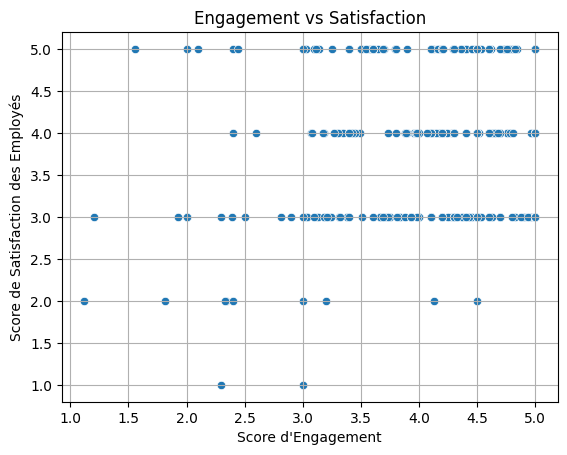

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=data["EngagementSurvey"],
    y=data["EmpSatisfaction"]
)
plt.title("Engagement vs Satisfaction")
plt.xlabel('Score d\'Engagement')
plt.ylabel('Score de Satisfaction des Employés')
plt.grid(True)
plt.show()

### Interprétation du graphique "Engagement vs Satisfaction"

-   **Corrélation positive** : La tendance générale indique que lorsque l'engagement augmente, la satisfaction des employés a également tendance à augmenter. Cela suggère qu'agir sur l'engagement peut être un levier efficace pour améliorer la satisfaction globale.

-   **Dispersion** : La dispersion des points sur le graphique, même avec une corrélation positive, peut indiquer un management hétérogène. Cela signifie que l'impact de l'engagement sur la satisfaction peut varier considérablement d'un groupe ou d'un manager à l'autre, ou que d'autres facteurs non mesurés jouent un rôle significatif.

In [ ]:
engagement_by_department = data.groupby("Department")["EngagementSurvey"].mean().sort_values()
print("Engagement moyen par département :\n", engagement_by_department)

Engagement moyen par département :
 Department
Sales                   3.818710
Software Engineering    4.061818
Production              4.129569
IT/IS                   4.154000
Admin Offices           4.393333
Executive Office        4.830000
Name: EngagementSurvey, dtype: float64


### Interprétation de l'Engagement par Département

L'analyse de l'engagement moyen par département révèle des disparités significatives, permettant de :

-   **Repérer les départements en difficulté** :
    -   Le département des **Ventes (Sales)** présente le score d'engagement moyen le plus bas (3.82), ce qui suggère qu'il pourrait être un département en difficulté nécessitant une attention particulière pour améliorer l'engagement des employés.
    -   L'**Ingénierie Logicielle (Software Engineering)** et la **Production** suivent avec des scores légèrement supérieurs mais restent en dessous de la moyenne générale, ce qui pourrait indiquer des domaines d'amélioration.

-   **Identifier les meilleures pratiques** :
    -   Le département **Executive Office** affiche le score d'engagement moyen le plus élevé (4.83), ce qui en fait un modèle de meilleures pratiques en matière d'engagement des employés. Il serait pertinent d'étudier les facteurs contribuant à ce niveau d'engagement pour les appliquer potentiellement à d'autres départements.
    -   Les **Bureaux Administratifs (Admin Offices)** et l'**IT/IS** présentent également de bons niveaux d'engagement, se positionnant comme des exemples positifs.